# C964 Capstone Project

## Video Game Recommender

#### Enter a video game title to get recommendations. 
#### Press reset to search again.
#### Confindence score ranges from -1.0 (inaccurate) to 1.0 (accurate).

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataframe
df = pd.read_csv('games_edit.csv')

# Remove title from dataset to only compare genres
genreData = df.drop(columns='Title')

#Use cosine similarity matrix for calculations
similarityMatrix = cosine_similarity(genreData)

#Function to recommend games, takes title and number of recommendations as parameters
def recommend_games(title, num_recommendations=3):
    title_index = df[df['Title'] == title].index[0] #finds index of provided title
    similarityScore = list(enumerate(similarityMatrix[title_index])) #Makes list of tuples for each game and it's simularity to input game
    sorted_scores = sorted(similarityScore, key=lambda x: x[1], reverse=True) #sorts list of scores in reverse so best up front
    similarityScore = sorted_scores[1:num_recommendations+1] #returns num of recs from list except 1st one which is title input

    #create list for top matching titles and their corresponding score
    game_indexes = [i[0] for i in similarityScore]
    game_scores = [i[1] for i in similarityScore]

    #Create separate dataframe for these top recommendations
    recommendations = pd.DataFrame({
        'Title': df['Title'].iloc[game_indexes],
        'Confindece Score': game_scores
    })

    return recommendations


In [2]:
#Title input box widget for UI
def title_input(change):
    if change['name'] == 'value':
        #current input
        current_input = combobox.value.lower()
        #filter game titles based on input
        matching_titles = [title for title in df['Title'] if current_input in title.lower()]
        #update dropdown options
        combobox.options = matching_titles
        #If found, display recommendations
        if current_input in [title.lower() for title in matching_titles]:
            actual_title = next((title for title in matching_titles if title.lower() == current_input), None)
            if actual_title:
                recommendedGames = recommend_games(actual_title, 3)
                with output:
                    clear_output(wait=True)
                    display(recommendedGames)

#Reset button for search widget
def reset_on_click(button):
    combobox.value = '' #search widget starts as empty string
    combobox.options = df['Title'].tolist() #shows dropdown as full list of games when search is empty
    with output:
        clear_output() #clears search widget and restarts it when called.

#creates combobox widget for UI input
combobox = widgets.Combobox(
    placeholder='Enter game title...',
    options=df['Title'].tolist(),
    description='Game Title:',
    ensure_option=True,
    disabled=False
)

#Observe changes in combobox input
combobox.observe(title_input)

#create reset button
reset_button = widgets.Button(description="Reset")
reset_button.on_click(reset_on_click)

#Create output widget
output = widgets.Output()

#Display the widgets
display(combobox, reset_button, output)

Combobox(value='', description='Game Title:', ensure_option=True, options=('Elden Ring', 'Hades', 'The Legend …

Button(description='Reset', style=ButtonStyle())

Output()

# Visualizers

## Barplot (Genre Distribution):

C:\Users\ricky\AppData\Local\Temp\ipykernel_22412\2193940694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


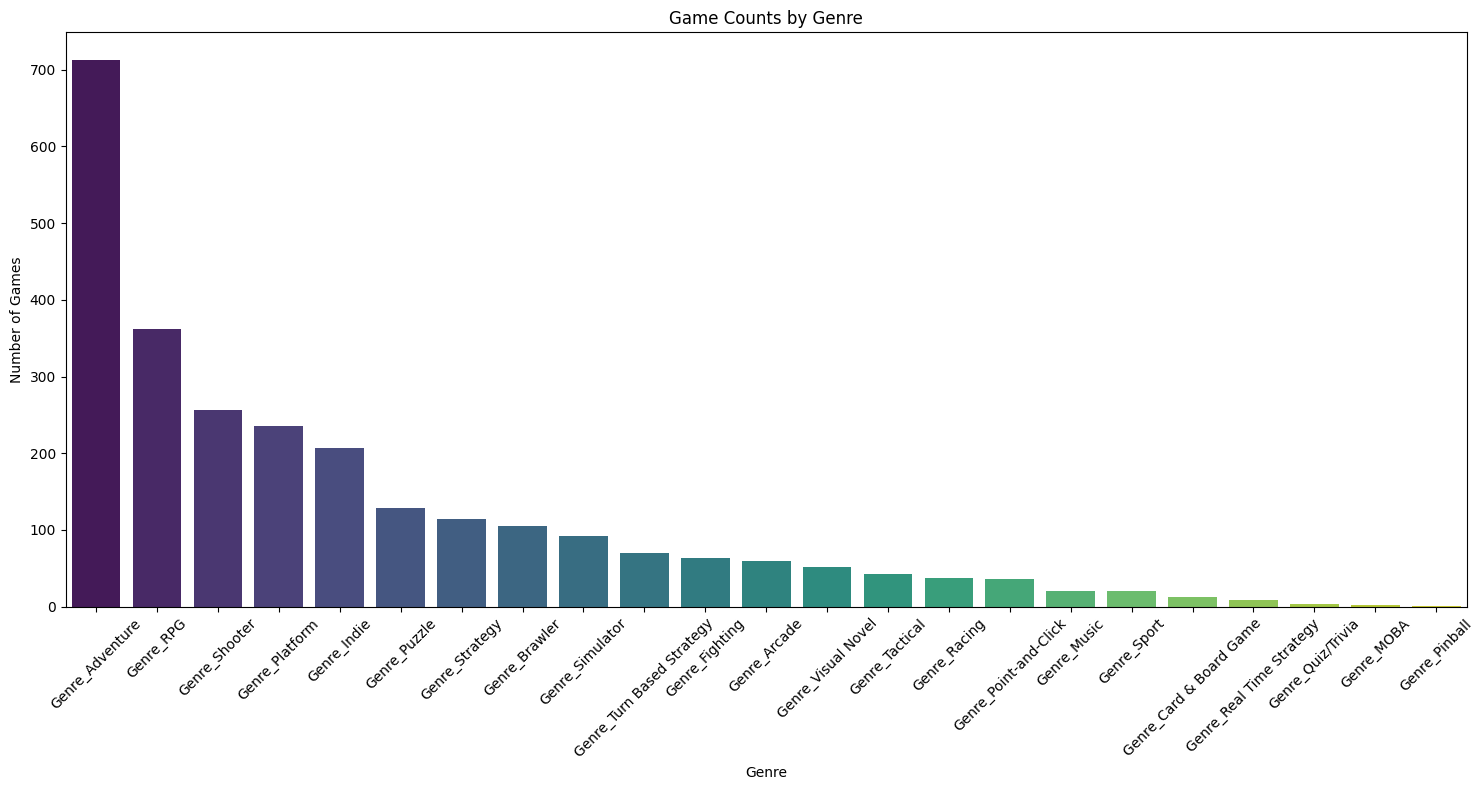

In [3]:
# Summing each genre column
genre_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Game Counts by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

## Correlation Matrix:

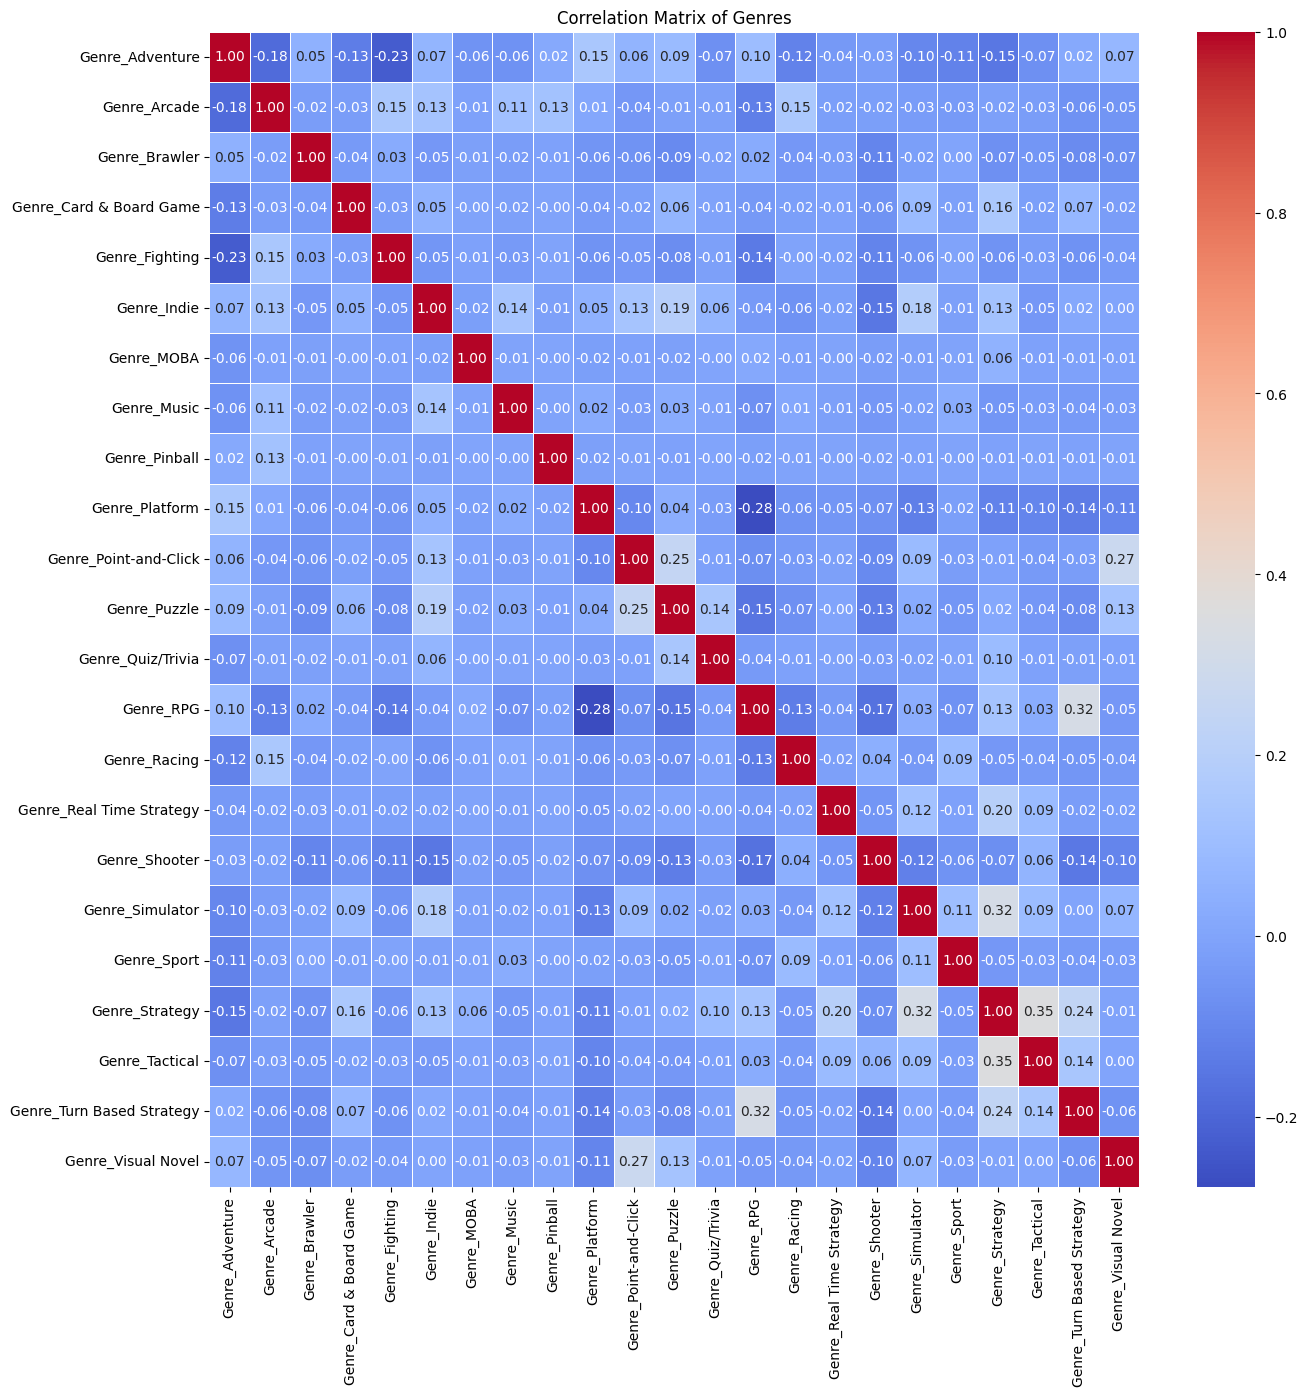

In [4]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.iloc[:, 1:].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Genres')
plt.show()

##  Histogram (Distribution of Games in Multiple Genres):

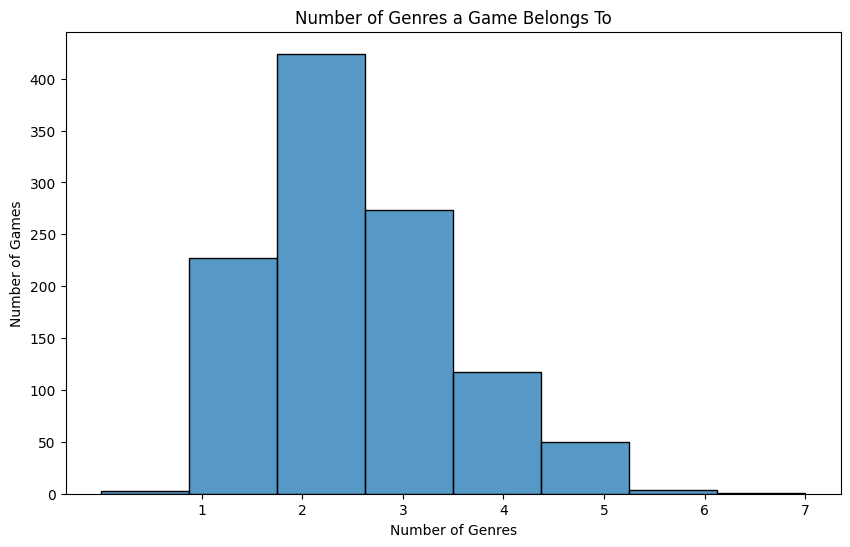

In [5]:
# Count the number of genres a game is in
num_genres = df.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(num_genres, bins=max(num_genres)-min(num_genres)+1, kde=False)
plt.title('Number of Genres a Game Belongs To')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Games')
plt.xticks(list(range(1, int(max(num_genres))+1)))
plt.show()